In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.read_csv('../data/gdp_percapita.csv')

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2023,1992.424394,NaN
1,Afghanistan,2022,1981.710168,NaN
2,Afghanistan,2021,2144.166570,NaN
3,Afghanistan,2020,2769.685745,NaN
4,Afghanistan,2019,2927.245144,NaN
...,...,...,...,...
8214,Zimbabwe,1994,3965.730986,NaN
8215,Zimbabwe,1993,3634.750494,NaN
8216,Zimbabwe,1992,3649.891947,NaN
8217,Zimbabwe,1991,4126.405247,NaN


#4 Using the pandas read_csv() method, read the GDP dataset into your notebook as a DataFrame called gdp_df.
#Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.


In [3]:
gdp_df=pd.read_csv('../data/gdp_percapita.csv')
print (gdp_df)

     Country or Area  Year        Value  Value Footnotes
0        Afghanistan  2023  1992.424394              NaN
1        Afghanistan  2022  1981.710168              NaN
2        Afghanistan  2021  2144.166570              NaN
3        Afghanistan  2020  2769.685745              NaN
4        Afghanistan  2019  2927.245144              NaN
...              ...   ...          ...              ...
8214        Zimbabwe  1994  3965.730986              NaN
8215        Zimbabwe  1993  3634.750494              NaN
8216        Zimbabwe  1992  3649.891947              NaN
8217        Zimbabwe  1991  4126.405247              NaN
8218        Zimbabwe  1990  4013.299059              NaN

[8219 rows x 4 columns]


#5 How many rows and columns are in gdp_df? What are the data types of each column?


In [4]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  8219 non-null   object 
 1   Year             8219 non-null   int64  
 2   Value            8219 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 257.0+ KB


#6 Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.


In [5]:
gdp_df = gdp_df.drop(columns = ['Value Footnotes'])
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  8219 non-null   object 
 1   Year             8219 non-null   int64  
 2   Value            8219 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 192.8+ KB


In [6]:
gdp_df = gdp_df.rename(columns={"Country or Area":"Country","Value":"GDP_Per_Capita"})
gdp_df.info()
print (gdp_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8219 entries, 0 to 8218
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         8219 non-null   object 
 1   Year            8219 non-null   int64  
 2   GDP_Per_Capita  8219 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 192.8+ KB
          Country  Year  GDP_Per_Capita
0     Afghanistan  2023     1992.424394
1     Afghanistan  2022     1981.710168
2     Afghanistan  2021     2144.166570
3     Afghanistan  2020     2769.685745
4     Afghanistan  2019     2927.245144
...           ...   ...             ...
8214     Zimbabwe  1994     3965.730986
8215     Zimbabwe  1993     3634.750494
8216     Zimbabwe  1992     3649.891947
8217     Zimbabwe  1991     4126.405247
8218     Zimbabwe  1990     4013.299059

[8219 rows x 3 columns]


7 How many countries have data for all years? Which countries are missing many years of data?
#Look at the number of observations per year. What do you notice?


In [7]:
print(min(gdp_df.Year))
print(max(gdp_df.Year))

1990
2023


In [8]:
range_of_years=(max(gdp_df.Year)-min(gdp_df.Year))
print(range_of_years )

33


In [36]:
countries = gdp_df.groupby('Country')['Year'].count().reset_index()

In [10]:
countries.max()

Country    Zimbabwe
Year             34
dtype: object

In [11]:
countries[countries['Year'] == 34].count()

Country    228
Year       228
dtype: int64

In [12]:
countries[countries['Year']<34].count()

Country    19
Year       19
dtype: int64

In [13]:
countries_missing_data=countries[countries['Year']<34]

In [14]:
countries_missing_data.info

<bound method DataFrame.info of                        Country  Year
0                  Afghanistan    24
23                      Bhutan    33
37              Cayman Islands    18
48                    CuraÃ§ao    24
54                    Djibouti    11
73               Faroe Islands    16
83                   Greenland    32
115                     Kosovo    16
125                    Lebanon    33
152                 Montenegro    27
188                 San Marino    26
191                     Serbia    29
195  Sint Maarten (Dutch part)    15
200                    Somalia    33
216       Syrian Arab Republic    33
225                      Tonga    33
229   Turks and Caicos Islands    13
242             Virgin Islands    21
243         West Bank and Gaza    30>

8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020.
Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section.
Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare 
and what information can you get out of one type that you can't necessarily get out of the others?


In [15]:
gdp_2020=gdp_df.loc[gdp_df["Year"]==2020,["GDP_Per_Capita"]]
print (gdp_2020)

      GDP_Per_Capita
3        2769.685745
27       3861.111238
61       4622.731427
95      14650.395929
129     14194.155748
...              ...
8068    45055.782930
8090     5423.682547
8120    18600.986362
8154     3391.595412
8188     2987.269823

[247 rows x 1 columns]


(array([111.,  59.,  23.,  23.,  15.,   9.,   3.,   0.,   3.,   1.]),
 array([   833.92025746,  13576.18426579,  26318.44827412,  39060.71228245,
         51802.97629078,  64545.24029911,  77287.50430744,  90029.76831577,
        102772.0323241 , 115514.29633243, 128256.56034076]),
 <BarContainer object of 10 artists>)

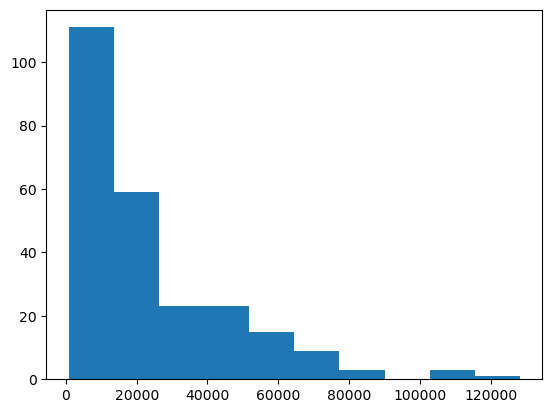

In [16]:
plt.hist(gdp_2020)

<Axes: ylabel='Density'>

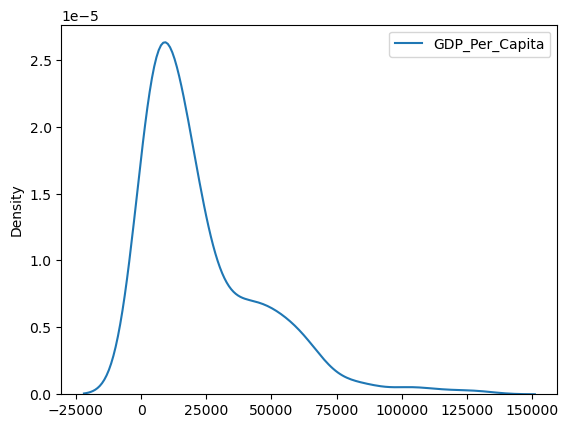

In [17]:
sns.kdeplot(gdp_2020)

{'whiskers': [<matplotlib.lines.Line2D at 0x1bf5450c910>,
 'caps': [<matplotlib.lines.Line2D at 0x1bf576c02d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bf5450c690>],
 'medians': [<matplotlib.lines.Line2D at 0x1bf576c0550>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bf576c0690>],
 'means': []}

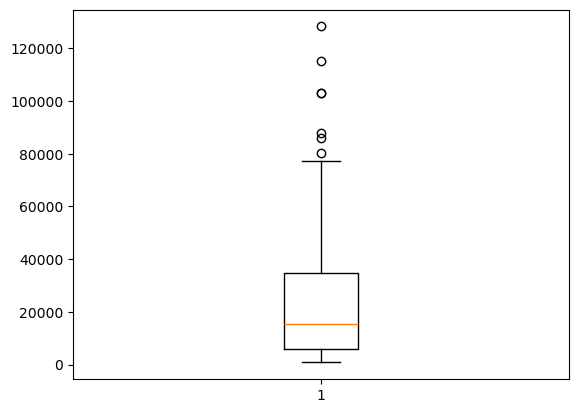

In [18]:
plt.boxplot(gdp_2020)

<Axes: >

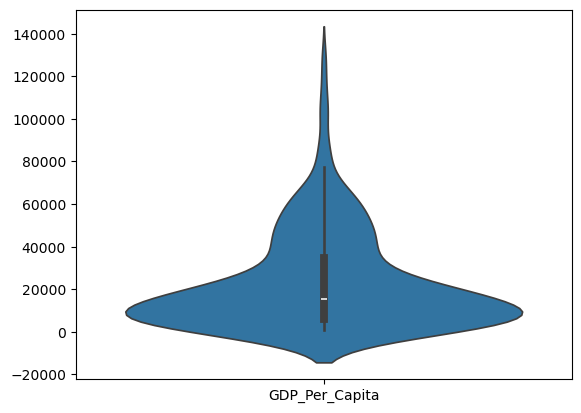

In [19]:
sns.violinplot(gdp_2020)

9. What was the median GDP per capita value in 2020?


In [20]:
median_gdp_2020=gdp_df.loc[gdp_df["Year"]==2020,["GDP_Per_Capita"]]
print(median_gdp_2020.median())


GDP_Per_Capita    15309.235988
dtype: float64


10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.


In [21]:
gdp_decades = gdp_df.loc[gdp_df.Year.isin([1990, 2000, 2010, 2020])]
print(gdp_decades)

                          Country  Year  GDP_Per_Capita
3                     Afghanistan  2020     2769.685745
13                    Afghanistan  2010     2848.586061
23                    Afghanistan  2000     1617.826475
27    Africa Eastern and Southern  2020     3861.111238
37    Africa Eastern and Southern  2010     3863.836012
...                           ...   ...             ...
8184                       Zambia  1990     2425.111287
8188                     Zimbabwe  2020     2987.269823
8198                     Zimbabwe  2010     2572.769992
8208                     Zimbabwe  2000     4071.022001
8218                     Zimbabwe  1990     4013.299059

[965 rows x 3 columns]


Box plot for the years 1990,2000,2010,2020

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

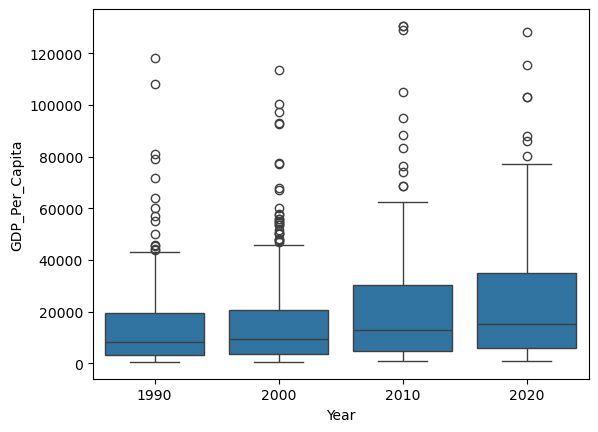

In [22]:
sns.boxplot(data=gdp_decades, x = 'Year', y= 'GDP_Per_Capita')

Barplot for the years

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

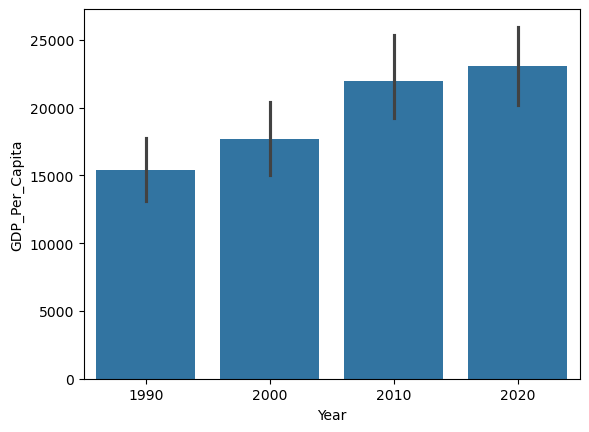

In [23]:
sns.barplot(x='Year', y='GDP_Per_Capita', data=gdp_decades)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

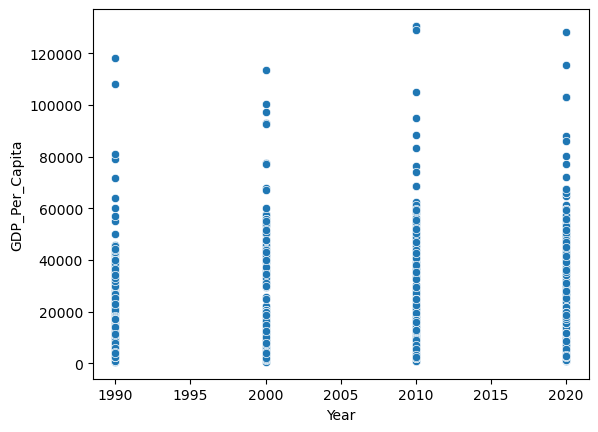

In [24]:
sns.scatterplot(x='Year', y='GDP_Per_Capita', data=gdp_decades)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

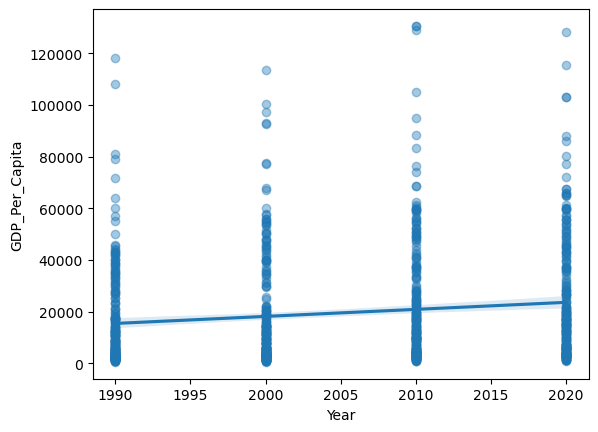

In [25]:
sns.regplot(x='Year', y='GDP_Per_Capita', data=gdp_decades, scatter_kws={'alpha':0.4})

11. Which country was the first to have a GDP per capita greater than $100,000?


In [26]:
gdp_over_100k=gdp_df.loc[gdp_df["GDP_Per_Capita"]>100000]
gdp_over_100k.loc[gdp_over_100k.Year==gdp_over_100k.Year.min()]

,Country,Year,GDP_Per_Capita
974,Brunei,1990,118163.683198
7827,United Arab Emirates,1990,108057.042464


12. Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.


In [27]:
#df.loc[(df['Age'] > 25) & (df['City'] == 'New York')]
high_gdp_country=gdp_df.loc[gdp_df["Year"]==2020]
#print(high_gdp_country)
top_gdp=high_gdp_country.sort_values("GDP_Per_Capita",ascending=False)
print(top_gdp)
#high_gdp_country.loc[high_gdp_country.Country==high_gdp_country.GDP_Per_Capita.max()]

                       Country  Year  GDP_Per_Capita
4426                Luxembourg  2020   128256.560341
6514                 Singapore  2020   115304.149459
6119                     Qatar  2020   103061.913414
3493                   Ireland  2020   102989.787335
741                    Bermuda  2020    87894.401174
...                        ...   ...             ...
5133                Mozambique  2020     1466.124765
6699                   Somalia  2020     1396.053436
1734           Dem. Rep. Congo  2020     1277.632863
1302  Central African Republic  2020     1136.570530
1046                   Burundi  2020      833.920257

[247 rows x 3 columns]


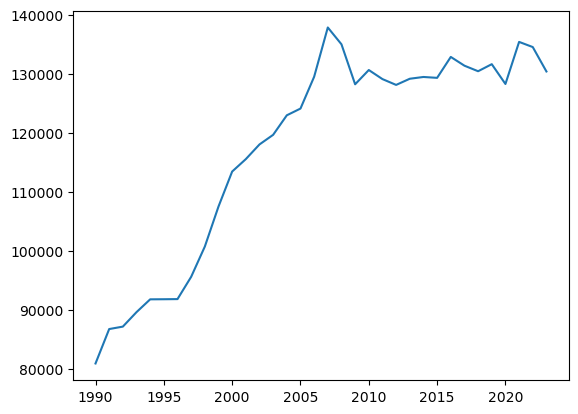

In [28]:
#plt.plot(gdp_df["Country"]=="Luxembourg",gdp_df["Year"])
gdp_lux=gdp_df.loc[gdp_df["Country"] == "Luxembourg",["Year","GDP_Per_Capita"]]
plt.plot(gdp_lux["Year"],gdp_lux["GDP_Per_Capita"])

13. Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. **Bonus question:** Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?


In [29]:
low_gdp_country=gdp_df.loc[gdp_df["Year"]==2020]
#print(high_gdp_country)
bottom_gdp=high_gdp_country.sort_values("GDP_Per_Capita")
print(bottom_gdp)

                       Country  Year  GDP_Per_Capita
1046                   Burundi  2020      833.920257
1302  Central African Republic  2020     1136.570530
1734           Dem. Rep. Congo  2020     1277.632863
6699                   Somalia  2020     1396.053436
5133                Mozambique  2020     1466.124765
...                        ...   ...             ...
741                    Bermuda  2020    87894.401174
3493                   Ireland  2020   102989.787335
6119                     Qatar  2020   103061.913414
6514                 Singapore  2020   115304.149459
4426                Luxembourg  2020   128256.560341

[247 rows x 3 columns]


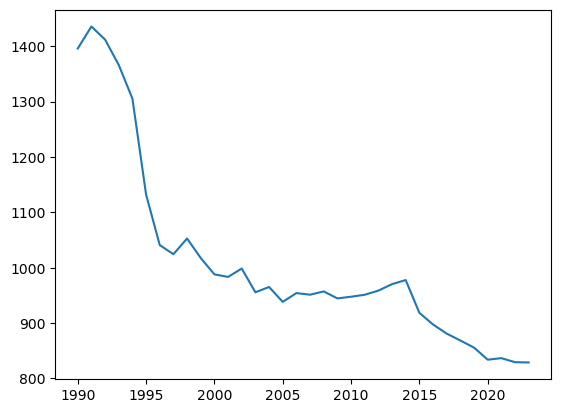

In [30]:
gdp_bur=gdp_df.loc[gdp_df["Country"] == "Burundi",["Year","GDP_Per_Capita"]]
plt.plot(gdp_bur["Year"],gdp_bur["GDP_Per_Capita"])

14. Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.


In [31]:
internet_df=pd.read_csv('../data/internet_use.csv', on_bad_lines='skip',engine='python',skipfooter=299)
print(internet_df)
internet_df.dtypes


     Country or Area  Year      Value Value Footnotes
0        Afghanistan  2019  17.600000               1
1        Afghanistan  2018  16.800000               2
2        Afghanistan  2017  13.500000               3
3        Afghanistan  2016  11.000000               4
4        Afghanistan  2015   8.260000               4
...              ...   ...        ...             ...
6077        Zimbabwe  1998   0.081648             NaN
6078        Zimbabwe  1997   0.033080             NaN
6079        Zimbabwe  1996   0.016790             NaN
6080        Zimbabwe  1995   0.007684             NaN
6081        Zimbabwe  1994   0.001739             NaN

[6082 rows x 4 columns]


Country or Area     object
Year                 int64
Value              float64
Value Footnotes     object
dtype: object

15. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.


In [32]:
internet_df=internet_df.drop(columns = ['Value Footnotes'])
internet_df=internet_df.rename(columns={"Country or Area":"Country","Value":"Internet_Users_Pct"})
print(internet_df)

          Country  Year  Internet_Users_Pct
0     Afghanistan  2019           17.600000
1     Afghanistan  2018           16.800000
2     Afghanistan  2017           13.500000
3     Afghanistan  2016           11.000000
4     Afghanistan  2015            8.260000
...           ...   ...                 ...
6077     Zimbabwe  1998            0.081648
6078     Zimbabwe  1997            0.033080
6079     Zimbabwe  1996            0.016790
6080     Zimbabwe  1995            0.007684
6081     Zimbabwe  1994            0.001739

[6082 rows x 3 columns]


16. Look at the number of observations in this dataset per year. What do you notice?


In [51]:
internet_obs=internet_df.Year.value_counts().reset_index()
sorted_internet_obs=internet_obs.sort_values("Year")
#sns.barplot(x='Year', y='count', data=internet_obs)

17. What is the first year to have a non-zero internet users percentage value?


In [52]:
internet_df.loc[internet_df["Internet_Users_Pct"]!=0].sort_values("Year")

,Country,Year,Internet_Users_Pct
4197,Norway,1990,0.707299
2829,Italy,1990,0.017545
3980,Netherlands (Kingdom of the),1990,0.334387
2192,Germany,1990,0.125892
2796,Israel,1990,0.110774
...,...,...,...
3141,Latvia,2023,92.187900
677,Bosnia and Herzegovina,2023,83.377200
427,Bangladesh,2023,44.502700
5266,Sweden,2023,95.703300


18. How does the distribution of internet users percent differ for 2000 and 2014?


In [ ]:
internet_df.loc[internet_df.Year.isin([2000,2014])]